### Word Cloud

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

- Stopwords

In [2]:
from nltk.corpus import stopwords 
sw_nltk = stopwords.words('english')
print(sw_nltk)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\user/nltk_data'
    - 'c:\\Users\\user\\anaconda3\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\user\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# WordCloud에서 제공하는 불용어
# type은 set 으로 중복없이..
sw_wc = STOPWORDS
print(sw_wc)

{'here', 'his', 'he', 'between', "wouldn't", 'get', "i'll", 'therefore', 'than', "they're", 'both', 'at', 'those', 'com', 'no', 'the', 'who', 'below', 'most', 'on', 'otherwise', "isn't", 'very', 'we', "we're", 'in', 'http', 'if', 'into', 'like', 'its', 'down', 'ourselves', "he'll", 'cannot', 'being', "you'll", 'been', "why's", "it's", 'own', 'shall', 'would', 'and', 'through', 'more', 'yourselves', 'why', "can't", "he'd", 'where', 'of', "what's", "she'd", "won't", "we'd", 'all', 'same', 'once', 'so', 'any', 'k', "there's", 'can', 'have', "you've", 'about', "we'll", 'off', "where's", 'do', 'to', 'during', 'it', 'while', "they'll", 'having', "haven't", 'such', 'how', 'am', 'doing', 'nor', 'ours', 'ever', 'itself', "he's", "let's", "doesn't", 'that', 'my', 'theirs', 'up', 'their', "that's", "wasn't", 'she', "hasn't", "they've", "didn't", 'not', "weren't", 'further', 'hence', 'because', 'himself', 'me', "she'll", "we've", 'does', 'what', 'i', "i've", 'just', 'an', 'since', "i'd", 'from', '

In [ ]:
len(sw_nltk), len(sw_wc)

(179, 192)

- Alice in Wonderland

In [ ]:
with open('data/Alice.txt') as f:
    text = f.read()

In [ ]:
# 불용어에 'said 추가 
sw_wc.add('said')

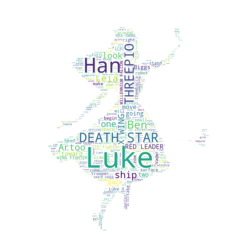

In [ ]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask 
    ).generate(text)

plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


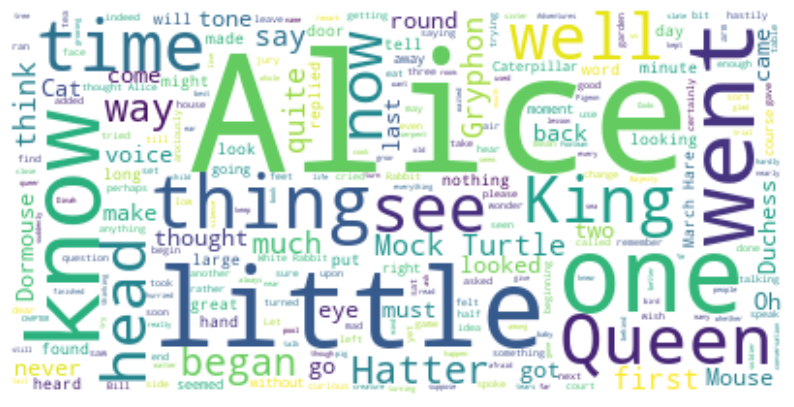

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 사용빈도 top 10
count = 0
for key, val in wc.words_.items(): # 딕셔너리
    print(f'{key}:\t{val}')
    count += 1
    if count > 10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208
well:	0.1721311475409836


- 배경 그림위에 표시하기

(-0.5, 899.5, 899.5, -0.5)

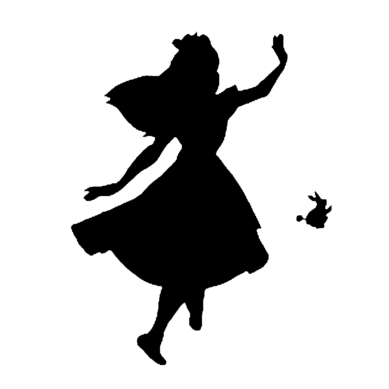

In [ ]:
mask = np.array(Image.open('data/Alice_mask.png')) # numpy로 만들어줘야 그림을사용가능
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

- Star Wars

In [ ]:
with open('data/A_new_hope.txt') as f:
    text = f.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", 'Luke')

In [ ]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw) # 192여야 하는데 list copy 현상으로 195 /192가 맞음 다시 import하기에는 사소하다심

195

(-0.5, 1189.5, 1027.5, -0.5)

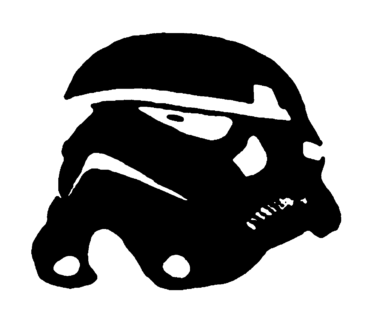

In [ ]:
mask = np.array(Image.open('data/Stormtrooper_mask.png')) # numpy로 만들어줘야 그림을사용가능
plt.figure(figsize=(8,4))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

In [ ]:
wc = WordCloud(
    mask=mask, max_words=1000, stopwords=sw,
    margin=10, random_state=2023
).generate(text)
default_colors = wc.to_array

In [ ]:
# HSB: Hue, Saturation(채도), Lrightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargss):
    return f'hsl(0, 0%, {np.random.randint(60,101)}%)' # 명도만 60~100까지올려주겠다

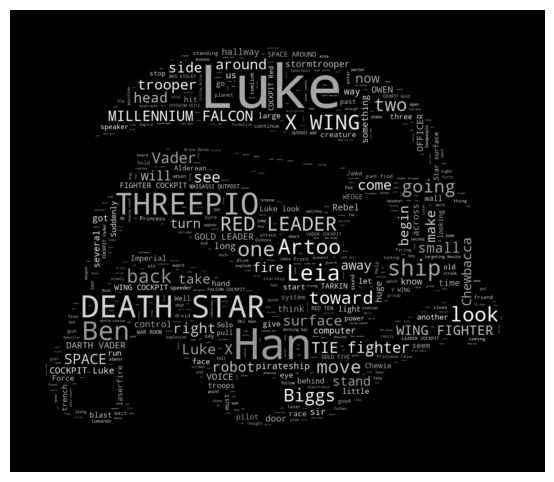

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023),
                      interpolation='bilinear')
plt.axis('off');